### Teste de Hipótese e Previsão de Resposta

<p>
<h4> Parâmetros</h4>
    População > 
    Amostra > Média, proporção ou variância
</p>

<p>
<h4>Teste de hipótese aplicados em b0 e b1 no caso de regressão linear</h4>

    Os valores de b0 e b1 determinam se há uma regressão linear

    Passos para realizar o teste de hipotese:

        1. Obter a reta de regressão linear y = b0 + b1x

        2. Definir o numero de n (numero de amostras)

        3. Definir o numero de k (numero de variaveis)

        4. Calcular gl = n - k (grau de liberdade)

        5. Testar hipótese H0: b1 = 0 frente a Ha: b1 != 0

            a. Definir o intervalo de confiança 1 - α = α(unicaudal) ou α/2 (bicaudal)

            b. Definir o intervalo crítico (t_crit) na tabela t-student para um determinado α e gl

            c. Definir a estatistica de teste t = b1_inf / sb1_inf

            d. Se |t| >= t_crit rejeitar H0<br>

            e. Caso contrario comparar se p - valor < α.

        6. Testar hipótese H0: b0 = 0 frente a Ha: b0 != 0

            a. Definir o intervalo de confiança 1 - α = α(unicaudal) ou α/2 (bicaudal)

            b. Definir o intervalo crítico (t_crit) na tabela t-student para um determinado α e gl

            c. Definir a estatistica de teste t = b0_inf / s * (pow((1/n) + ((x_mean**2) / sxx)), 1/2))

            d. Se |t| >= tcrit rejeitar H0

            e. Caso contrario comparar se 2(p - valor) < α
</p>



<p>
<h4>Inferências sobre μy,x</h4>

Definir uma variável T para obter a estatística de teste para reta

    T = (b0_inf + (b1_inf*x) - b0 + (b1*x)) / s(b0_inf + b1_inf*x)
    
    T = (y_inf - b0 + (b1*x)) / s(b0_inf + b1_inf*x)
    
    ic = y_inf +- t(alpha/2,n-2) * sy_inf
</p>

<p>
<h4>Intervalo de confiança:</h4>

    Encontrar o valor de yh para um determinado intervalo
    yh = bh0 + (bh1 * x)

    Calcular desvio padrao estimado
    s_yh = s * np.sqrt((1 / n) + ((x - x_mean)**2) / sxx)

    Desvio padrao calculado para o intervalo
    s_ic = t_crit * s_yh

    uy,x = yh +- (yh - s_ic)(yh + s_ic)
</p>

<p>
<h4>Intervalo de Previsão</h4>

    ip = y_inf +- t(alpha/2,n-2) * np.sqrt((s2**2) * (sy_inf**2))
</p>

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import t

#### Help functions

In [3]:
def first_analysis_lr(x, y, xlabel, ylabel):    
    #Cálculos e equação da reta entre duas variáveis aleatórias
    df = pd.DataFrame({'x':x, 'y':y})

    #x médio:
    x_mean = df['x'].mean()

    #y médio:
    y_mean = df['y'].mean()

    #Somatória dos valores de x:
    x_sum = df['x'].sum()

    #Somatória dos valores de y:
    y_sum = df['y'].sum()

    #Somatória de x * y:
    xy_sum = (df['x'] * df['y']).sum()

    #Somatória dos valores de x quadrado:
    x2_sum = (df['x']**2).sum()

    #Somatória dos valores de y quadrado:
    y2_sum = (df['y']**2).sum()

    #Número de amostras:
    n = df.shape[0]

    #Fórnulas complementares para cálculo de b1:
    sxy = xy_sum - ((x_sum * y_sum) / n)
    sxx = x2_sum - ((x_sum**2) / n)
    syy = y2_sum - ( (y_sum**2)/ n)

    #Estimativa do coeficiente de inclinação b1(beta 1):
    b1 = sxy / sxx

    #Estimativa do intercepto b_0(beta 0):
    b0 = (y_sum - (b1 * x_sum)) / n
    b0 = y_mean - (b1 * x_mean)

    #SQE => Soma de Quadrados dos Erros / SQT => Somatória de Quadrados Total / SQR => Soma de quadrados da Regressão:
    sqe = y2_sum - (b0 * y_sum) - (b1 * xy_sum)
    sqe = syy - (b1 * sxy)
    sqt = y2_sum - ( (y_sum**2)/ n)
    sqr = sqt - sqe

    #Equação da reta:
    print('Equação da reta: y = {} + {}x'.format(b0, b1))

    return {xlabel+'_mean':x_mean, 
            ylabel+'_mean':y_mean, 
            xlabel+'_sum':x_sum, 
            ylabel+'_sum':y_sum, 
            xlabel+'_'+ylabel+'_sum':xy_sum,
            xlabel+'2_sum':x2_sum, 
            ylabel+'2_sum':y2_sum,
            'n':n,
            'sxy':sxy,
            'sxx':sxx,
            'syy':syy,
            'b1':b1,
            'b0':b0,
            'sqe':sqe,
            'sqt':sqt,
            'sqr':sqr}

def var(sqe, n):
    #Variância(s2) e Desvio-padrão
    s2 = sqe / (n - 2)

    return {'variancia':s2}



def std(sqe, n):
    s2 = sqe / (n - 2)
    s = np.sqrt(s2)

    return {'std':s}



def coef_corr(sxy, sxx, syy):
    #Cálculo do coeficiente de correlação de Pearson
    r = sxy / np.sqrt(sxx*syy)

    return {'coef_corr':r}



def coef_det(sqe, sqt):
    #Coeficiente de Determinação => Explica se a reta descreve um modelo linear
    r2 = 1 - (sqe / sqt)

    return {'coef_det':r2}



def confidence_interval(s, sxx, ic, n, b1):
    #Intervalo de confiança:
    #Obter o erro padrão estimado de beta 1
    sb1_inf = s / np.sqrt(sxx)
    print('Erro padrão estimado:', sb1_inf)

    #t student => t , alpha/2, n-2 (COnsultar na tabela)
    alpha = 1 - (ic / 100)
    gl = n - 2
    t_student = t.ppf(1 - (alpha / 2), gl)

    #b1_inf = b1 +- intervalo
    intervalo = t_student * sb1_inf

    print('IC de {}% = ({}, {})'.format(ic, b1 - intervalo, b1 + intervalo))

    return None

#### Dataset

In [4]:
df = pd.read_csv('data/carst.csv', delimiter = ',')
df.head()

,brand/model/year,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
0,Gurgel BR800 0.8 1991,792,12.0,33,650,34.4,2,0
1,FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,4,0
2,Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5,3,0
3,FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5,4,0
4,VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8,4,0


#### 1.
<p>
Observe na seguinte tabela os dados de 28 carros disponiveis na loja GT Auto, a capacidade volumétrica(cc) como variável preditora e o consumo(km/l) como variavel resposta.

Calcule o valor da ESTATÍSTICA DE TESTE, ao nível de confiança de 95%, realize o teste de utilidade do modelo, se a reta é:

consumo = 12.14401 - 0.00135x e o erro padrão é sb1_inf = s / √Sxx = 0.0001177
<p>

In [6]:
#verificar H0: b1 = 0 frente Ha: b1 != 0 para y = 12.14401 - 0.00135x             
n = 28                                      #numero de amostras
k = 2                                       #numero de variaveis
gl = n - k                                  #grau de liberdade
alpha = (1 - 0.95) / 2                      #bicaudal
t_student = 2.0555                          #verificar tabela t-student -> t_crit = t(a/2, n-2) = t(0.025, 26) = 2. (95%)
sb1_inf = 0.0001177                         #erro padrao
b1 = 0                                      #valor da hipótese
b1_inf = -0.00135                           #beta1 da equação
t_calc = (b1_inf - b1) / sb1_inf             #t calculado

#|t_calc| > t_student
print('t_calc = {} > t_student = {}, Rejeitar h0 pois no nível de significância de 5% b1 é != 0'.format(t_calc, t_student))

t_calc = -11.469838572642312 > t_student = 2.0555, Rejeitar h0 pois no nível de significância de 5% b1 é != 0


#### 2. 
<p>
Realize o teste de funcionalidade do modelo para intercepto(b0), lembrando que a reta de regressão é y = 12.14401 - 0.00135x, s = 1.25, x_mean = 3003 e Sxx = 112735060. 

Após calcule o intervalo de confiança do intercepto da reta
</p>

In [7]:
#verificar H0: b0 = 0 frente Ha: b0 != 0 para -> y = 12.14401 - 0.00135x                  
n = 28                                                                              #numero de amostras
k = 2                                                                               #numero de variaveis
gl = n - k                                                                          #grau de liberdade
s = 1.25                                                                            #desvio padrao
x_mean = 3003                                                                       #x medio
sxx = 112735060                                                                     #sxx
alpha = (1 - 0.95) / 2                                                              #bicaudal
t_student = 2.0555                                                                  #verificar tabela t-student -> t_crit = t(a/2, n-2) = t(0.025, 26) = 2.0555
b0_inf = 12.14401                                                                   #valor da equação
b0 = 0                                                                              #valor da hipótese
t_calc = (b0_inf - b0) / (s * np.sqrt((1/n) + ((x_mean**2) / sxx)))                 #t calculado
print('t_calc = {} > t_student = {}, Rejeitar H0\n'.format(t_calc, t_student))

#intervalo de confiança
sb0_inf = s * np.sqrt((1 / n) + ((x_mean**2) / sxx))                                #desvio padrao
ic = t_student * sb0_inf
print('IC no nível de 95%:\nb0_inf = ({},{})'.format(b0_inf - ic, b0_inf + ic))

t_calc = 28.560898180715167 > t_student = 2.0555, Rejeitar H0

IC no nível de 95%:
b0_inf = (11.270017438664699,13.018002561335301)


#### 3.
<p>
Considerando os dados da GT Auto, cuja reta de regressão é y = 12.14401 - 0.00135x. Calcule o intervalo de confiança para o nível de confiança de 95% para uma capacidade volumétrica média de 3500.

Valores calculados dos exemplos anteriores:

r2 = 0.8346   /   x_sum = 84084   /   y_sum = 226.7   /   x2_sum = 365239312   /   y2_sum = 2081.25   /   

xy_sum = 528830.6   /   x_mean = 3003   /   y_mean = 226.7   /   Sxx = 112735060   /   Sxy = -151950   /   

Syy = 245.7896   /   s2 = 1.563   /   s = 1.250   /   SQE = 40.6571   /   SQT = 245.7896   /   t(0.025, 26) = 2.0555
<p>

In [8]:
#cálculo é realizado com os dados do modelo todo
#y = 12.14401 - 0.00135x
b0_inf = 12.14401
b1_inf = -0.00135
x = 3500
n = 28
x_mean = 3003
sxx = 112735060
t_student = 2.055
s = 1.25

#o intervalo esta centralizado em:
y_inf = b0_inf + (b1_inf * x)

#desvio padrao estimado de y
sy_inf = s * np.sqrt((1 / n) + (((x - x_mean)**2) / sxx))

#Intervalo
ic = t_student * sy_inf

print('uy,3500 = ({},{})'.format(y_inf - ic, y_inf + ic))


uy,3500 = (6.918892494939884,7.919127505060114)


#### 4.
<p>
Calcular o intervalo de previsão para o nível de confiança de 95% para uma capacidade volumétrica média de 3500.

Considerando os dados da GT Auto, cuja reta de regressão é y = 12.14401 - 0.00135x e utilizando os dados do exercício anterior
</p>

In [9]:
#y = 12.14401 - 0.00135x
s = 1.25
t_crit = 2.055
sy_inf = 0.24337                  #Obtido no exercício anterior
yh = 7.419                        #Obtido no exercício anterior

#desvio padrão estimado para intervalo de previsão
sy_ip = np.sqrt((s**2) - (sy_inf**2))

#intervalo calculado
ip = t_crit * sy_ip

print('Intervalço de Previsão: ({}, {})'.format(y_inf - ip, y_inf + ip))

Intervalço de Previsão: (4.899416541366766, 9.938603458633231)


#### 5.
Considerando a reta y = 12.14401 - 0.00135x, que tem um valor esperado de 6,744 para uma variável preditora de 4000, o valor médio da variável preditora é 3003, os dados têm 28 amostras, Sxx = 1127355060, s = 1.25 e t (α/2, n-2) = 2.0555.

Qual é o desvio-padrão s_yh o intervalo de confiança do valor uy:4000?

In [50]:
#Refazer com a função para cálculo
#y = 12.14401 - 0.00135x
bh0 = 12.14401
bh1 = -0.00135
x_mean = 3003
x = 4000
n = 28
sxx = 1127355060
s = 1.25
t_crit = 2.055
yh = 6.744

#desvio padrão
s_yh = s * np.sqrt((1 / n) + ((x - x_mean)**2) / sxx)

#desvio calculado
s_ic = t_crit * s_yh

print('Desvio padrão: {}, \nIntervalo de confiança: ({})({})'.format(s_yh, yh - s_ic, yh + s_ic))

Desvio padrão: 0.2391260242189196, 
Intervalo de confiança: (6.25259602023012)(7.235403979769879)


#### 6.
<p>
Consulte os dados sobre x = taxa de liberação na área do queimador (MBth/h - pe²) e y = taxa de emissão de NOx (ppm) fornecidos da tabela a seguir e responda:

O modelo de regressão linear simples especifica uma relação útil entre as duas taxas? Use o procedimento de teste apropriado para obter informações sobre o valor -p e, em seguida, tire uma conclusão usando o nível de significância 0,01.

    x = 100, 125, 125, 150, 150, 200, 200, 250, 250, 300, 300, 350, 400, 400
    
    y = 150, 140, 180, 210, 190, 320, 280, 400, 430, 440, 390, 600, 610, 670
</p>

##### a. 
O modelo de regressão linear simples especifica uma relação útil entre as duas taxas? Use o procedimento de teste apropriado para obter informações sobre o valor -p e, em seguida, tire uma conclusão usando o nível de significância 0,01.

In [58]:
#dataframe
x = [100, 125, 125, 150, 150, 200, 200, 250, 250, 300, 300, 350, 400, 400]
y = [150, 140, 180, 210, 190, 320, 280, 400, 430, 440, 390, 600, 610, 670]

df = pd.DataFrame({'x':x, 'y':y})
df

,x,y
0,100,150
1,125,140
2,125,180
3,150,210
4,150,190
5,200,320
6,200,280
7,250,400
8,250,430
9,300,440


In [62]:
#Equação da reta
lr = first_analysis_lr(x, y, 'x', 'y')

#Coeficiente de determinação
r2 = coef_det(lr['sqe'], lr['sqt'])
print('Coeficiente de determinação:{}'.format(r2['coef_det']))

#t-student
alpha = 0.01
gl = lr['n'] - 2
t_student = t.ppf(1 - alpha/2, gl)
print('t_student = {}'.format(t_student))

#t_calc
s = std(lr['sqe'], lr['n'])
sb1_inf = s['std'] / np.sqrt(lr['sxx'])
t_calc = lr['b1'] / sb1_inf
print('t_calc = {}'.format(t_calc))

print('Como |t_calc| > t_student, rejeitar a hipótese')

#IC 95%
ic = t_student * sb1_inf

print('IC 95%: ({},{})'.format(lr['b1'] - ic, lr['b1'] + ic))

#Devido o aumento de 10Btu multiplicar por 10
print('IC 95% com aumento de 10Btu: ({},{})'.format((lr['b1'] - ic) * 10, (lr['b1'] + ic) * 10))

Equação da reta: y = -45.551905387647935 + 1.711432325886991x
Coeficiente de determinação:0.960878666923257
t_student = 3.0545395883368704
t_calc = 17.167935626273994
Como |t_calc| > t_student, rejeitar a hipótese
IC 95%: (1.4069322446902262,2.015932407083756)
IC 95% com aumento de 10Btu: (14.069322446902262,20.15932407083756)


##### b.
<p>
Calcule um IC de 95% para a mudança esperada na taxa de emissão associada com um aumento de 10MBtu/h - pe² (MBtu/h - pe² = 3,14 MW/m²) na taxa de liberação.
</p>

In [66]:
#t-student
alpha = 0.05
gl = lr['n'] - 2
t_student = t.ppf(1 - alpha/2, gl)

#Desvio calculado
s_ic = t_student * sb1_inf

print('Intervalo de Confiança: ({}, {})'.format(lr['b1'] - s_ic, lr['b1'] + s_ic))

Intervalo de Confiança: (1.494231446881099, 1.928633204892883)


In [68]:
#como o valor é para 10 x b1
print('Intervalo de Confiança: ({}, {})'.format((lr['b1'] - s_ic) * 10, (lr['b1'] + s_ic) * 10))

Intervalo de Confiança: (14.942314468810991, 19.28633204892883)


#### 7.
<p>
O modelo de regressão linear simples para 27 observações de dados que representam: x = módulo de elasticidade e y = resistência flexural, resultou em: 

y_inf =  7,592 | sy_inf = 0,179 e x = 40

Y_inf =  9,741 | sy_inf = 0,253 e x = 60.


A média de x é 45 e a SQE=18,7356.
</p>

##### a.
<p>
Expique por que s_yh é maior quando x = 60 do que quando x = 40 (Como informação extra, a média de x é 45).
</p>

In [69]:
#Analisando a fórmula: 's_yh = s * np.sqrt((1 / n) + ((x - x_mean)**2) / sxx)', quanto maior x, maior s_yh

##### b.
<p>
Calcule um intervalo de confiança com um nível de confiança de 95% para a resistência média verdadeira de todas as vigas cujo módulo de elasticidade é 40.
</p>

In [70]:
y_inf = 7.592
x = 40
n = 27
x_mean = 45
sqe = 18.7356
sy_inf = 0.179

#t-student
alpha = 0.05
gl = n - 2
t_student = t.ppf(1 - alpha/2, gl)

#desvio padrao
ic = t_student * sy_inf

print('uy,40 = ({})({})'.format(y_inf - ic, y_inf + ic))

uy,40 = (7.22334259905716)(7.960657400942839)


##### c.
<p>
Calcule um intervalo de previsão com um nível de previsão de 95% para a resistência de uma única viga cujo módulo de elasticidade é 4.
</p>

In [71]:
yh = 7.592
x = 4
n = 27
x_mean = 45
sqe = 18.7356
sy_inf = 0.179
s2 = sqe / (n - 2)
s = np.sqrt(s2)

#tabela t-student
alpha = 0.05
gl = n - 2
t_crit = t.ppf(1 - alpha/2, gl)

#desvio padrão estimado para intervalo de previsão
sy_ip = np.sqrt((s**2) - (sy_inf**2))

#desvio padrao calculado
ip = t_student * sy_ip

print('Intervalço de Previsão: ({}, {})'.format(y_inf - ip, y_inf + ip))


Intervalço de Previsão: (5.847602456495378, 9.336397543504622)


##### d.
<p>
Se for calculado um IC de 95% para a resistência média verdadeira quando o módulo de elasticidade é 60, qual será o nível de confiança simultâneo para ambos os intervalos calculados no item (b)? 
</p>

In [72]:
#aplicação do intervalo de Bonferroni
alpha = 0.05
k = 2                                               #numero de observações simultaneas
nc = (1 - (k * alpha))
print('Nível de confianca: {}%'.format(nc * 100))


Nível de confianca: 90.0%


#### 8.
<p>
Foi analisado um conjunto de dezoito dados x e y, que forneceram os seguintes resultados:

    sum x = 152,70

    sum y = 671,00

    sum xy = 5380,84

    sum x2 = 1312,6764   

    sum y2 = 31231,00  

    x mean = 8.4833   

    y mean = 37.2778  
</p>

##### a. 
<p>
Calcule o intervalo de previsão de 95% para x = 9.
</P>

In [54]:
#x médio:
mean_x = 8.4833

#y médio:
mean_y = 37.2778

#Somatória dos valores de x:
sum_x = 152.7

#Somatória dos valores de y:
sum_y = 671

#Somatória de x * y:
sum_xy = 5380.84

#Somatória dos valores de x quadrado:
sum_x2 = 1312.6764

#Somatória dos valores de y quadrado:
sum_y2 = 31231

#Número de amostras:
n = 18

#Fórmulas complementares para cálculo de b1:
sxy = sum_xy - ((sum_x * sum_y) / n)
sxx = sum_x2 - ((sum_x ** 2) / n)
syy = sum_y2 - ((sum_y ** 2) / n)

#b1 => Inclinação da reta:
b1 = sxy / sxx

#b0 => Intercepto no eixo y:
b0 = mean_y - (b1 * mean_x)

#sqe
sqe = syy - (b1 * sxy)

print('Equação da reta: y = {} {}x'.format(b0, b1))


#o intervalo esta centralizado em:
x = 9
yh = b0 + (b1 * x)

#tabela t-student
alpha = 0.05
gl = n - 2
t_crit = t.ppf(1 - alpha/2, gl)

#desvio padrao estimado
s_yh = s * np.sqrt((1 / n) + ((x - mean_x)**2) / sxx)

#desvio padrao calculado
s_ic = t_crit * s_yh

print('uy,9 = {} +- ({})({})'.format(yh, yh - s_ic, yh + s_ic))


#Intervalo de previsão
s2 = sqe / n - 2
s = np.sqrt(s2)

#desvio padrao estimado
s_ip = np.sqrt((s**2) - (s_yh**2))

#desvio padrao calculado
s_calc = t_crit * s_ip

print('Intervalço de Previsão: ({}, {})'.format(yh - s_calc, yh + s_calc))

Equação da reta: y = 190.26771432850165 -18.034245438508798x
uy,9 = 27.95950538192247 +- (27.47045853745142)(28.448552226393517)
Intervalço de Previsão: (16.09932924550381, 39.81968151834113)


##### b.
<p>
Calcule os intervalos de confiança do valor esperado de três amostras com um nível de confiança de, pelo menos, 97%. As amostras adotam os seguintes valores x1=7, x2=8 e x3=9.

Uma vez realizados todos os cálculos, verifique os seguintes itens que contêm alguns resultados:
</p>

In [122]:
#100(1-alpha) de cada intervalor
0.99*0.99*0.99

0.9702989999999999

In [125]:
#y para cada valor de x indicado.
x1 = 7
x2 = 8
x3 = 9
uy7 = b0 + (b1 * x1)
uy8 = b0 + (b1 * x2)
uy9 = b0 + (b1 * x3)
uy7, uy8, uy9

(64.02799625894008, 45.99375082043127, 27.95950538192247)

In [126]:
#t-student
alpha = 0.01                                          
t_crit = t.ppf(1 - alpha/2, gl) 
print(t_crit) 

2.9207816223499967


In [127]:
#desvio padrao de cada valor
s_y7 = s * pow(((1 / n) + (x1 - mean_x) * (x1 - mean_x) / sxx), 1 / 2)
s_y8 = s * pow(((1 / n) + (x2 - mean_x) * (x2 - mean_x) / sxx), 1 / 2)
s_y9 = s * pow(((1 / n) + (x3 - mean_x) * (x3 - mean_x) / sxx), 1 / 2)
s_y7,s_y8,s_y9

(2.620032781508452, 1.609986924578677, 1.6323665879699925)

In [128]:
#IC do valor esperado para várias observações x = 7, 8, 9
ic7 = t_crit * s_y7
ic8 = t_crit * s_y8
ic9 = t_crit * s_y9

print('O intervalo de confiança para y, x = 7: ({}, {})'.format(uy7 - ic7, uy7 + ic7))
print('O intervalo de confiança para y, x = 8: ({}, {})'.format(uy8 - ic8, uy8 + ic8))
print('O intervalo de confiança para y, x = 9: ({}, {})'.format(uy9 - ic9, uy9 + ic9))

O intervalo de confiança para y, x = 7: (56.37545266075565, 71.68053985712451)
O intervalo de confiança para y, x = 8: (41.291330598898085, 50.69617104196446)
O intervalo de confiança para y, x = 9: (23.191719050841545, 32.727291713003396)


#### 9.
<p>
Considere o seguinte conjunto de dados, em que x = pH e y = arsênio removido (%) por um determinado processo.

    x = [7.01, 7.11, 7.12, 7.24, 7.94, 7.94, 8.04, 8.05, 8.07, 8.90, 8.94, 8.95, 8.97, 8.98, 9.85, 9.86, 9.86, 9.87]
    
    y = [60, 67 , 66, 52, 50, 45, 52, 48, 40, 23, 20, 40, 31, 26, 9, 22, 13, 7]

Estime os parâmetros da reta de regressão usando o software computacional e considerando que s_yh = 1.61, calcule o intervalo de confiança da porcentagem de arsênico removido quando o pH vale 8,0. Utilize um nível de confiança de 99 %.
</p>

In [136]:
x = [7.01, 7.11, 7.12, 7.24, 7.94, 7.94, 8.04, 8.05, 8.07, 8.90, 8.94, 8.95, 8.97, 8.98, 9.85, 9.86, 9.86, 9.87]
y = [60, 67 , 66, 52, 50, 45, 52, 48, 40, 23, 20, 40, 31, 26, 9, 22, 13, 7]
df = pd.DataFrame({'x':x, 'y':y})

#x médio:
mean_x = df['x'].mean()

#y médio:
mean_y = df['y'].mean()

#Somatória dos valores de x:
sum_x = df['x'].sum()

#Somatória dos valores de y:
sum_y = df['y'].sum()

#Somatória de x * y:
df['xy'] = df['x'] * df['y']
sum_xy = df['xy'].sum()

#Somatória dos valores de x quadrado:
df['x2'] = df['x'] ** 2
sum_x2 = df['x2'].sum()

#Somatória dos valores de y quadrado:
df['y2'] = df['y'] ** 2
sum_y2 = df['y2'].sum()

#Número de amostras:
n = df.shape[0]

#Fórmulas complementares para cálculo de b1:
sxy = sum_xy - ((sum_x * sum_y) / n)
sxx = sum_x2 - ((sum_x ** 2) / n)

#b1 => Inclinação da reta:
b1 = sxy / sxx

#b0 => Intercepto no eixo y:
b0 = mean_y - (b1 * mean_x)

#uy,8
ph = 8
yh = b0 + (b1 * ph)
print('Equação da reta: y = {} {}x'.format(b0, b1))

#t-student
alpha = 0.01                                          
t_crit = t.ppf(1 - alpha/2, gl)

s_yh = 1.61

ic = t_crit * s_yh

print('O intervalo de confiança: ({}, {})'.format(yh - ic, yh + ic))

Equação da reta: y = 190.26829324779405 -18.034245438508798x
O intervalo de confiança: (41.291871327740175, 50.69678815170716)


#### 10.
<p>
Se o valor de t_crit = 2.0484 para um nível de confiança é 95%, analise o resultado apresentado e responda: qual é o valor do intervalo de confiança de b1.
</p>

In [138]:
x = [0.40, 0.42, 0.48, 0.51, 0.57, 0.60, 0.70, 0.75, 0.75, 0.78, 0.84, 0.95, 0.99, 1.03, 1.12, 1.15, 1.20,
        1.25, 1.25, 1.28, 1.30, 1.34, 1.37, 1.40, 1.43, 1.46, 1.49, 1.55, 1.58, 1.60]

y = [1.02, 1.21, 0.88, 0.98, 1.52, 1.83, 1.50, 1.80, 1.74, 1.63, 2.00, 2.80, 2.48, 2.47, 3.05, 3.18, 3.76,
        3.68, 3.82, 3.21, 4.27, 3.12, 3.99, 3.75, 4.10, 4.18, 3.77, 4.34, 4.21, 4.92]

x = sm.add_constant(x)
modelo = sm.OLS(y, x).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     418.3
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           2.25e-18
Time:                        15:24:29   Log-Likelihood:                -6.2045
No. Observations:                  30   AIC:                             16.41
Df Residuals:                      28   BIC:                             19.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3977      0.168     -2.367      0.0

In [139]:
b1 = 3.08
y = -0.3977 + (3.08 * x)
t_crit = 2.0484
s_b1 = 0.151
ic = t_crit * s_b1
print('Intervalo de confiança: ({}, {})'.format(b1 - ic, b1 + ic))

Intervalo de confiança: (2.7706916, 3.3893084)


#### 11.
<p>
Calcule a reta de regressão linear dos dados a seguir, em que x = pH e y = arsênio removido (%) por um determinado processo. Verifique se o coeficiente de determinação e as estatísticas de teste indicam que o modelo descreve a relação linear entre essas variáveis, depois calcule a porcentagem de arsênio removido que pode se esperar para um pH = 8,0, adotando para o cálculo o menor b1 fornecido pelo intervalo de confiança de b1. 

    x = [7.01, 7.11, 7.12, 7.24, 7.94, 7.94, 8.04, 8.05, 8.07, 8.90, 8.94, 8.95, 8.97, 8.98, 9.85, 9.86, 9.86, 9.87]

    y= [60, 67 , 66, 52, 50, 45, 52, 48, 40, 23, 20, 40, 31, 26, 9, 22, 13, 7]
</p>

In [149]:
x = [7.01, 7.11, 7.12, 7.24, 7.94, 7.94, 8.04, 8.05, 8.07, 8.90, 8.94, 8.95, 8.97, 8.98, 9.85, 9.86, 9.86, 9.87]
y= [60, 67 , 66, 52, 50, 45, 52, 48, 40, 23, 20, 40, 31, 26, 9, 22, 13, 7]
df = pd.DataFrame({'x':x, 'y':y})

x = sm.add_constant(x)
modelo = sm.OLS(y, x).fit()
print(modelo.summary())

b1 = -21.159
b0 = 190.2683

x = 8
uy8 = b0 + (b1 * x)
print(uy8)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     149.7
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           1.55e-09
Time:                        15:55:00   Log-Likelihood:                -57.105
No. Observations:                  18   AIC:                             118.2
Df Residuals:                      16   BIC:                             120.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        190.2683     12.587     15.116      0.0

/home/felipe_oliveira/data-science/Statistical Modeling and Inference/statistical-modeling-inference/venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### 12.
<p>

    x = [0.40, 0.42, 0.48, 0.51, 0.57, 0.60, 0.70, 0.75, 0.75, 0.78, 0.84, 0.95, 0.99, 1.03, 1.12, 1.15, 1.20, 1.25, 1.25, 1.28, 1.30, 1.34, 1.37, 
        1.40, 1.43, 1.46, 1.49, 1.55, 1.58, 1.60]

    y = [1.02, 1.21, 0.88, 0.98, 1.52, 1.83, 1.50, 1.80, 1.74, 1.63, 2.00, 2.80, 2.48, 2.47, 3.05, 3.18, 3.76, 3.68, 3.82, 3.21, 4.27, 3.12, 3.99,
        3.75, 4.10, 4.18, 3.77, 4.34, 4.21, 4.92]    
</p>

In [151]:
x = [0.40, 0.42, 0.48, 0.51, 0.57, 0.60, 0.70, 0.75, 0.75, 0.78, 0.84, 0.95, 0.99, 1.03, 1.12, 1.15, 1.20, 1.25, 1.25, 1.28, 1.30, 1.34, 1.37, 
        1.40, 1.43, 1.46, 1.49, 1.55, 1.58, 1.60]

y = [1.02, 1.21, 0.88, 0.98, 1.52, 1.83, 1.50, 1.80, 1.74, 1.63, 2.00, 2.80, 2.48, 2.47, 3.05, 3.18, 3.76, 3.68, 3.82, 3.21, 4.27, 3.12, 3.99,
        3.75, 4.10, 4.18, 3.77, 4.34, 4.21, 4.92]

df = pd.DataFrame({'x':x, 'y':y})

x = sm.add_constant(x)
modelo = sm.OLS(y, x).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     418.3
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           2.25e-18
Time:                        16:00:00   Log-Likelihood:                -6.2045
No. Observations:                  30   AIC:                             16.41
Df Residuals:                      28   BIC:                             19.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3977      0.168     -2.367      0.0

In [152]:
#t-student
alpha = 0.05                                          
t_crit = t.ppf(1 - alpha/2, 28)
t_crit

2.048407141795244

### Notebook aula

#### 1.
<p>
Os dados a seguir x = velocidade do fluxo e y = quantidade de gotículas:

    x = 89, 177, 189, 354, 362, 442, 965
    
    y = 0.40, 0.60, 0.48, 0.66, 0.61, 0.69, 0.99


</p>

In [10]:
x = [89, 177, 189, 354, 362, 442, 965]
y = [0.40, 0.60, 0.48, 0.66, 0.61, 0.69, 0.99]

df = pd.DataFrame({'x':x, 'y':y})
df

,x,y
0,89,0.40
1,177,0.60
2,189,0.48
3,354,0.66
4,362,0.61
5,442,0.69
6,965,0.99


##### a.
<p>
Os pesquisadores executaram uma análise de regressão linear simples para relacionar as duas variáveis. O gráfico de dispersão dos dados apoia essa estratégia?
</p>

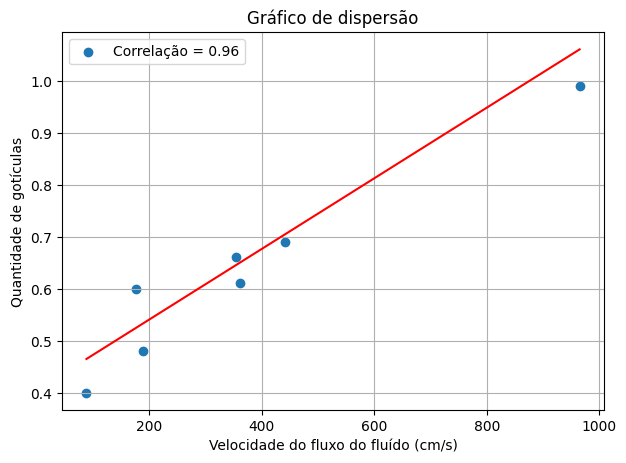

In [15]:
x = df['x']
y = df['y']
yh = 0.4041 + (0.00068 * x)
plt.rcParams.update({'figure.figsize':(7, 5), 'figure.dpi':100})
plt.scatter(x, y, label = f'Correlação = {np.round(np.corrcoef(x, y)[0, 1], 2)}')
plt.plot(x, yh, color='r')
plt.xlabel('Velocidade do fluxo do fluído (cm/s)')
plt.ylabel('Quantidade de gotículas')
plt.title('Gráfico de dispersão')
plt.legend()
plt.grid(True)
plt.show()

#Sim, a esstratégia é adequada

##### b. 
<p>
Que porporção (coeficiente de determinação) observada no volume de névoa pode ser atribuída à relação de regressão linear simples entre velocidade e névoa?
</p>

In [16]:
x = sm.add_constant(x)

#fit linear regression model
modelo = sm.OLS(y, x).fit()
print(modelo.summary())

#Coeficiente de determinação: r² = 0.931, significa que 93.1% de relação entre gotícula e velocidade

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     67.15
Date:                Mon, 02 May 2022   Prob (F-statistic):           0.000440
Time:                        15:01:19   Log-Likelihood:                 11.671
No. Observations:                   7   AIC:                            -19.34
Df Residuals:                       5   BIC:                            -19.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4041      0.035     11.684      0.0

/home/felipe_oliveira/data-science/Statistical Modeling and Inference/statistical-modeling-inference/venv/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


**Explicação do resultado** OLS (*Ordinary Least Squares*)

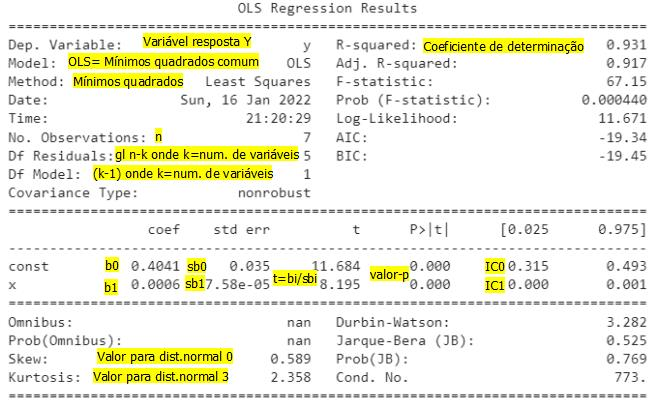

##### c.
<p>
Os investigadores estavam particularmente interessados no impacto sobre a névoa ao aumentar a velocidade de 100 para 1000. Quando x aumenta dessa forma, há alguma evidência significativa de que o aumento médio verdadeiro em y seja menor que 0,6?
</p>

In [18]:
#tabela t-student
alpha = 0.05
gl = len(x) - 2
t_student = t.ppf(1 - alpha/2, gl)

#teste de hipótese
var_x = 1000 - 100
var_y = 0.6
b1_inf = 0.00062108
sb1_inf = 0.0000758
b1 = var_y / var_x                     #hipótese
t_calc = (b1_inf - b1) / sb1_inf
print('|{}| >= {} negada, Não há evidência que o aumento médio seja menor que 0,6'.format(t_calc, t_student))

|-0.6014072119613016| >= 2.5705818366147395 negada, Não há evidência que o aumento médio seja menor que 0,6


##### d.
<p>
Estime a mudança média verdadeira na névoa associada com um aumento de velocidade de 1cm/s. Faça isso de maneira que transmita informações sobre precisão e confiança.
</p>

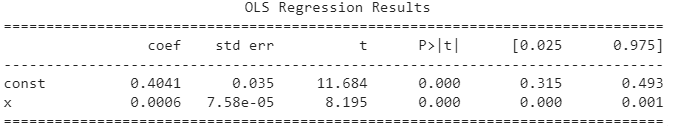

IC de $\beta_1= \hat{\beta}_1 \pm t_{\frac{\alpha}{2},n-2} s_{\hat{\beta}_1}  $

In [49]:
#Cálculo do intervalo de confiança de b1
#v é o nome com que foi armazenado t_crit
b1a=b1+t_student*7.58e-5
b1b=b1-t_student*7.58e-5
b1b,b1a

(0.0004718165634512694, 0.0008615167698820639)

In [ ]:
#Alguns complementos para observação 
y_pred=modelo.predict()
y_pred

array([0.45939953, 0.51405421, 0.52150712, 0.62398463, 0.62895324,
       0.6786393 , 1.00346197])

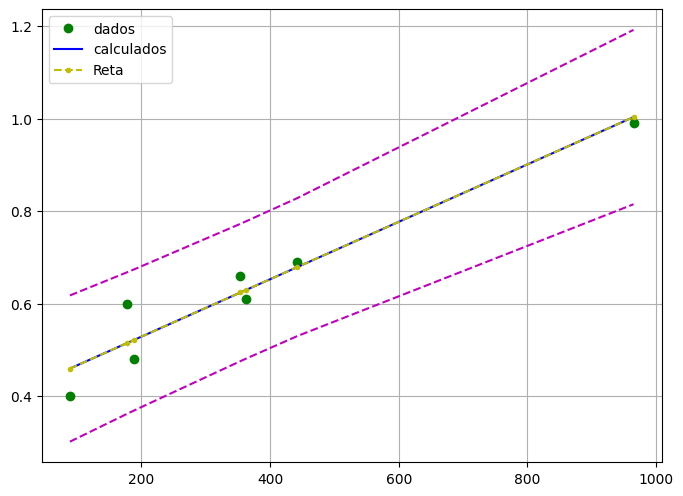

In [ ]:
#Observar o intervalo de previsão
pred_ols = modelo.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"] #dentro [] define só mostrar extremos
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "go", label="dados")
ax.plot(x, y_pred, "b-", label="calculados")
ax.plot(x, modelo.fittedvalues, "y--.", label="Reta")
ax.plot(x, iv_u, "m--")
ax.plot(x, iv_l, "m--")
ax.legend(loc="best")
plt.grid(True)

#### 2.
<p>
y = constante dielétrica a

x = vácuo de ar(%)

para 18 amostras tendo 5% de teor de asfalto

A reta de regressão é y = 4,8587 - 0,07468x

O coeficiente de determinação desdes dados foi r² = 0,7797 e o desvio padrão estimado de b1 = 0,09923. Faça um teste de hipótese para verificar se o valor da variação da constante dielétrica frente à porcentagem de vácuo pode ser maior que -0,05, utilizando nível de significância de 0,01

Definir hipótese nula e alternativa:

H0: b1 = -0,05 / H1: b1 > -0,05
</p>

In [19]:
alpha = 0.01
n = 18
gl = n - 2
t_crit = t.ppf(1 - alpha/2, gl)
print('t_crit = {}'.format(t_crit))

t_crit = 2.9207816223499967


In [20]:
#Calcular a estatistica de teste sendo:
b1 = -0.05
sb1_inf = 0.09923
b1_inf = -0.07468

t = (b1_inf - b1) / sb1_inf
print('|t| >= t_crit negada, {} < {}'.format(t, t_crit))

|t| >= t_crit negada, -0.24871510631865357 < 2.9207816223499967


#### 3.
<p>
Considere os dados a seguir:

x = concentração de Ge(variando entre 0 e 1)

y = posição do nível Fermi(eV)

    x = 0.00, 0.42, 0.23, 0.33, 0.62, 0.60, 0.45, 0.87, 0.90, 0.79, 1.00, 1.00, 1.00

    y = 0.62, 0.53, 0.61, 0.59, 0.50, 0.55, 0.59, 0.31, 0.43, 0.46, 0.23, 0.22, 0.19
</p>

Equação da reta: y = 0.7217185973357485 + -0.43268474608583807x


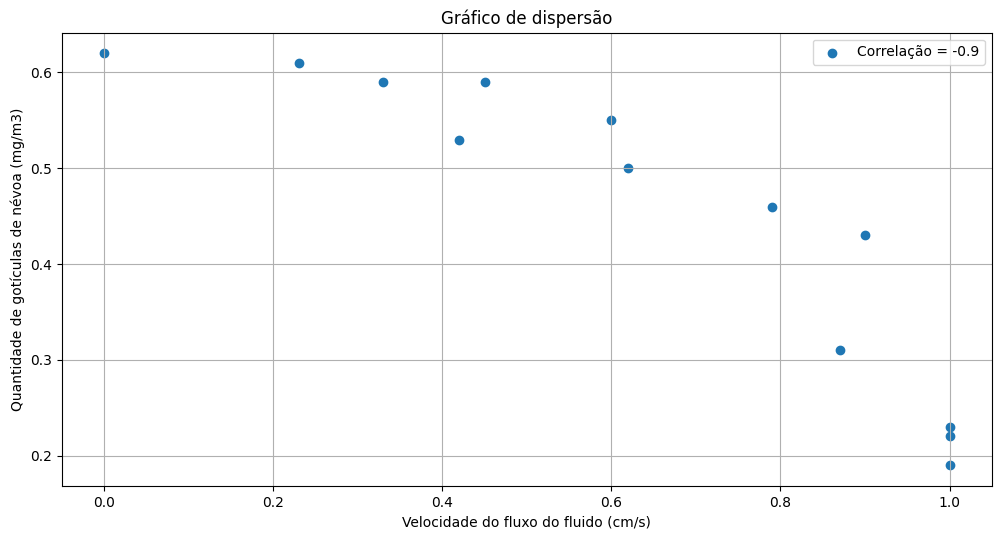

In [35]:
#análise do gráfico de dispersão
x = [0.00, 0.42, 0.23, 0.33, 0.62, 0.60, 0.45, 0.87, 0.90, 0.79, 1.00, 1.00, 1.00]
y = [0.62, 0.53, 0.61, 0.59, 0.50, 0.55, 0.59, 0.31, 0.43, 0.46, 0.23, 0.22, 0.19]
df = pd.DataFrame({'x':x, 'y':y})

fa = first_analysis_lr(x, y, 'x', 'y')

plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':100})
plt.scatter(x,y, label=f'Correlação = {np.round(np.corrcoef(x,y)[0,1], 2)}')
plt.xlabel('Velocidade do fluxo do fluido (cm/s)')
plt.ylabel('Quantidade de gotículas de névoa (mg/m3)') 
plt.title('Gráfico de dispersão')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
#análise dos dados de regressão 
x = sm.add_constant(x)

#fit linear regression model
modelo = sm.OLS(y, x).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     44.43
Date:                Mon, 02 May 2022   Prob (F-statistic):           3.53e-05
Time:                        15:17:42   Log-Likelihood:                 16.530
No. Observations:                  13   AIC:                            -29.06
Df Residuals:                      11   BIC:                            -27.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7217      0.046     15.753      0.0

/home/felipe_oliveira/data-science/Statistical Modeling and Inference/statistical-modeling-inference/venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


##### a.
<p>
Obtenha uma curva estimativa intervalar da mudança esperada na posição do nível de Fermi associada com um aumento de 0,1 nas concentrações de Ge e interprete ser resultado
</p>

In [29]:
#b1
b=modelo.params
b0=b[0]#intercepto
b1=b[1]#inclinação
b1

-0.43268474608583807

In [30]:
#usar a tabela tstudent pata t
from scipy.stats import t
alpha = 0.05  # nível de significia = 5% 
df = len(x) - 2 # graus de liberdade (Número de amostras menos dois)                                     
#
v = t.ppf(1 - alpha/2, df) 
ta2=v
print(f't=: {v}') 

t=: 2.200985160082949


In [31]:
sb=modelo.bse #desvio padrão
#sb0=sb[0]    #desvio padrão de b0
sb1=sb[1]     #desvio padrão de b1
sb1

0.06491029555205573

In [32]:
#IC de b1
ic =([b1-ta2*sb1,b1+ta2*sb1])
ic

[-0.575551343332511, -0.2898181488391652]

##### b.
<p>
Obtenha uma estimativa de intervalo para a média da posição do nível de Fermi quando a concentração é 0,50 e interprete seu resultado
</p>

In [40]:
uy05=b0+b1*0.5
uy05

0.5053762242928298

In [54]:
x = 0.5
sy_inf = s * np.sqrt((1 / fa['n']) + (((x - fa['x_mean'])**2) / fa['sxx']))
sy_inf

0.3756736000709177

In [55]:
#IC do valor esperado para um valor específico de x 
ic = ([uy05 - ta2*sy_inf, uy05 + ta2*sy_inf])
ic

[-0.32147579449819674, 1.3322282430838563]

##### c.
<p>
Obtenha um intervalo dos valores plausíveis para a posição resultante de uma única observação a ser feita quando a concentração é 0,50, interprete ser intervalo e o compare ao intervalo de "b"
</p>

In [57]:
#valor de y-chapeu para uma única observação uy05 calculado em 2b
#ta2 valor t-student usado nos items anteriores
ip1y05=([uy05-ta2*pow((s2+sy*sy),1/2),uy05+ta2*pow((s2+sy*sy),1/2)])
ip1y05

KeyError: 's2'

##### d.
<p>
Obtenha IC simultâneos para a posição esperada quando a concentração é 0,3, 0,5 e 0,7; o nível de confiança conjunto deve ser de pelo menos 97%
</p>

Considerando que 100(1 - (k * alpha)) = 97%

Quantidade de observações simultâneas k=3 encontrar $\alpha$

$(1-k\alpha) = 0,97 $ 

$1-3\alpha = 0,97 $ 

$\alpha = \frac{0.03}{3} = 0,01$

Portanto cada observação deve ter um $\alpha = 0,01$, isto é o 99% de confiança

In [ ]:
#100(1-alpha) de cada intervalor
0.99*0.99*0.99

0.9702989999999999

Estimativa de Y para x=0,3, 0,5 e 0,7, ou seja o intervalo de estimado de Y para um único valor de cada x indicado.

$\mu_{Y,x^*}=\beta_0 + \beta_1 x^*=0,7217 - 0,4327 (x^*)$

In [112]:
x3 = 0.3
x5 = 0.5
x7 = 0.7
uy03d=b0+b1*x3
uy05d=b0+b1*x5
uy07d=b0+b1*x7
uy03d,uy05d,uy07d

(array([       nan, 0.59191317]),
 array([       nan, 0.50537622]),
 array([       nan, 0.41883928]))

In [ ]:
#usar a tabela tstudent pata t
from scipy.stats import t
alpha = 0.01  # nível de significia = 5% 
df = len(x) - 2 # graus de liberdade (Número de amostras menos dois)                                     
#
v = t.ppf(1 - alpha/2, df) 
ta2d=v
print(f't=: {v}') 

t=: 3.105806513221101


In [ ]:
#xm=x.mean()
#n=modelo.df_resid + 2 #gl+2=n
xm,n
sy3=s*pow(((1/n)+(x3-xm)*(x3-xm)/sxx),1/2)
sy5=s*pow(((1/n)+(x5-xm)*(x5-xm)/sxx),1/2)
sy7=s*pow(((1/n)+(x7-xm)*(x7-xm)/sxx),1/2)
sy3,sy5,sy7

(0.02969165089768393, 0.022166944519205978, 0.020933715463280694)

In [ ]:
#IC do valor esperado para várias observações x=0,3 0,5 e 0,7 
ICuy03d=([uy03d-ta2d*sy3,uy03d+ta2d*sy3])
ICuy05d=([uy05d-ta2d*sy5,uy05d+ta2d*sy5])
ICuy07d=([uy07d-ta2d*sy7,uy07d+ta2d*sy7])
print(f'O intervalo de confiança para y, x=0,3= {ICuy03d}')
print(f'O intervalo de confiança para y, x=0,5= {ICuy05d}')
print(f'O intervalo de confiança para y, x=0,7= {ICuy07d}')
#print('Os intervalos de confiança são: Para y, x=0,3= {0}, para y, x=0,5=  {1}, para y, x=0,7= {0} {2}'.format(ICuy03d,ICuy05d,ICuy07d))
#ICuy03d,ICuy05d,ICuy07d

O intervalo de confiança para y, x=0,3= [0.4996966507636827, 0.6841296962563105]
O intervalo de confiança para y, x=0,5= [0.4365299836268683, 0.5742224649587897]
O intervalo de confiança para y, x=0,7= [0.35382320524388716, 0.48385534490743604]


A 95% de confiança IP é $0.3359 < Y < 0.67489$